
# K-NN(K-Nearest Neighbors) Model

* Used for both classification and Regression

* Non parametric ML Algorithm

* Lazy algorithm as KNN does not have a training step

* Sensitive to outliers, accuracy is impacted by noise or irrelevant data.

* K is K nearest neighbors.

* K should be an odd number.

* K-nn'de Küçük bir K değeri overfitting'e yol açabileceği gibi büyük bir K değeri de underfitting'e neden olabilir. Yüksek K değeri overfitting'i önlememize yardımcı olabilir. Fakat Portilla'nın örneğinde olduğu gibi küçük hata veresede daha yüksek bir K değeri seçildiğinde özellikle veri kümenizin kenar değerlerinde ve sınıf karar sınırlarında (desicion boundry) tahmin gücünü kaybetmeye başlayabilirsiniz. İdeali, küçük K ve küçük hata değerlerinde optimum çözüm bulamaya çalışmak.

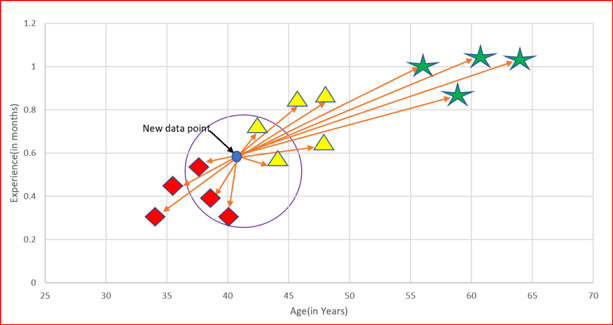

* Distance can be calculated using Euclidean distance(default) or Manhattan distance

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data",index_col=0)
# ilk sutunu index olarak al: index_col=0

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
# Veride featurelar gizlenmis. Target class in ne anlama geldigini de bilmiyoruz.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [6]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [7]:
# max degerlerine bakarak scale etmek gerekip gerekmedigine karar veririz.

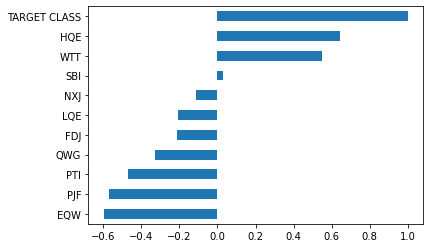

In [8]:
df.corr()["TARGET CLASS"].sort_values().plot.barh();

# Pre Proccessing

## Standardize the Variables

> Scaling is important for this model, as the KNN evaluates the distance between the observations.

> Bu projede Splittinden once scale tercih ettik 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

# scale edilen veriyi tersine cevirme inverse_transform(X, copy=None) ile yapilir.

In [11]:
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759


## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=scaled_features
y=df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Modelling

## Using KNN

> First, we will create the KNN model for k = 1.

> n_neighbors=5 (default)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
model = KNeighborsClassifier(n_neighbors=1)

# KNN Model can also be used for regression, but in practice it is used more for classification modeling.

model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = model.predict(X_test)

## Predictions and Evaluations

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

print(*confusion_matrix(y_test,y_pred), sep="\n")

[134   8]
[ 11 147]


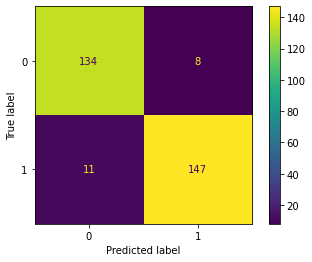

In [18]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test);

In [19]:
# # Alternative
# from sklearn.metrics import classification_report,confusion_matrix
# sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label');

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [21]:
# from yellowbrick.classifier import ClassificationReport
# visualizer = ClassificationReport(model, support=True)
# visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
# visualizer.score(X_test, y_test)        # Evaluate the model on the test data
# visualizer.show();

## Find Optimum K Value with Elbow Method

* Elbow metod accuracy kullanir, classification da accuracye bakilmaz. dolayisiyla cok guvenilir bir k bulma yontemi degildir.
* Normalde optimum k bulmak icin GridSearchCV kullanilir.

In [22]:
error_rate = []
# Her bir error rate icin olusan k degeri bu listeye atilacak

# Will take some time
for i in range(1,40):
    
    model = KNeighborsClassifier(n_neighbors=i) # k= i
    model.fit(X_train,y_train)
    y_pred_i = model.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test)) 
    

print('Optimum K_Value: ',error_rate.index(min(error_rate)))

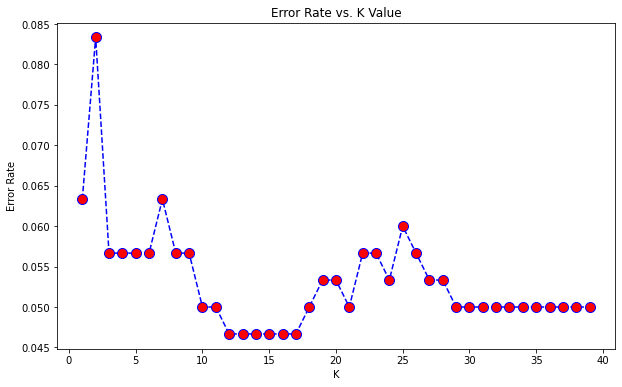

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),
         error_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

In [25]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

Maximum accuracy:- 0.9533333333333334 at K = 11


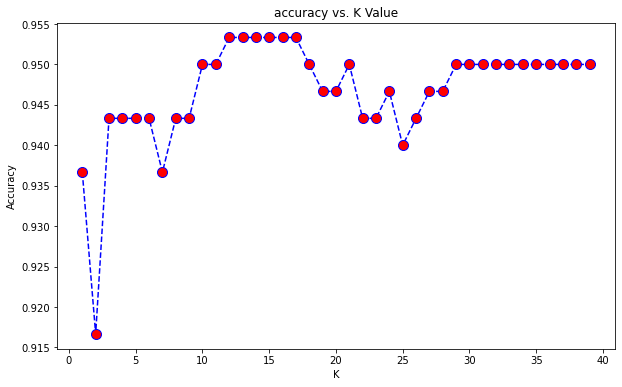

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),
         acc,
         color = 'blue',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red', 
         markersize=10);
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

# Accuracy, error rate in tersi oluyor

In [27]:
# WITH K= k value giving maximum accuracy, in this example k=11

model = KNeighborsClassifier(n_neighbors=acc.index(max(acc)))

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f'WITH K={acc.index(max(acc))}',
      *confusion_matrix(y_test,y_pred),
      classification_report(y_test,y_pred),sep='\n')

WITH K=11
[135   7]
[  8 150]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [28]:
# Alternative

# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(model,X_test,y_test, ax=None);

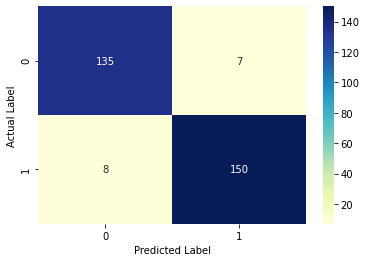

In [29]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

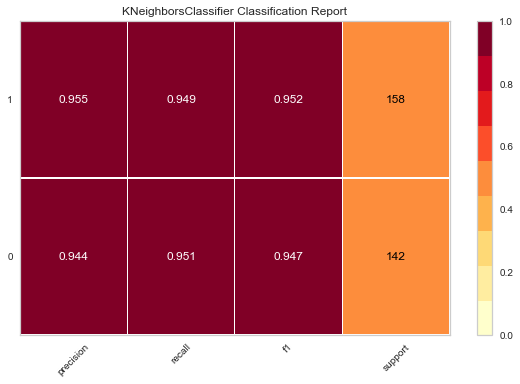

In [30]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(model, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

### GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": range(1,50,2)} # k tek sayi olmali

knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [56]:
knn_cv_model.best_params_

{'n_neighbors': 31}

In [57]:
knn_tuned= KNeighborsClassifier(n_neighbors = 31).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       142
           1       0.96      0.95      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



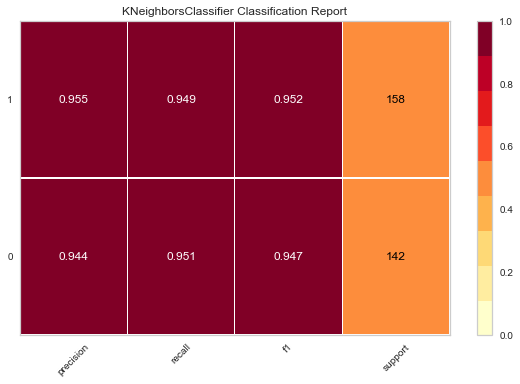

In [58]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(knn_tuned, support=True)
visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();